In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("dataset_cleaned.csv")
df.head()

,client_age,contact_duration,contacts_campaign,days_since_previous_contact,previous_contacts,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3_months_rate,number_employees,...,period_oct_mon,period_oct_thu,period_oct_tue,period_oct_wed,period_sep_fri,period_sep_mon,period_sep_thu,period_sep_tue,period_sep_wed,y
0,33.0,69.0,1.0,-1.0,0.0,-1.8,92.893,-46.2,1.540246,5099.100000,...,False,False,False,False,False,False,False,False,False,0
1,25.0,206.0,1.0,-1.0,0.0,1.4,93.918,-42.7,4.768843,5228.100000,...,False,False,False,False,False,False,False,False,False,0
2,25.0,120.0,1.0,-1.0,0.0,-1.8,93.075,-47.1,1.339274,5099.100000,...,False,False,False,False,False,False,False,False,False,1
3,57.0,231.0,3.0,-1.0,0.0,1.4,93.918,-42.7,4.669467,5417.510274,...,False,False,False,False,False,False,False,False,False,0
4,59.0,216.0,3.0,-1.0,0.0,1.4,94.465,-41.8,5.064369,5228.100000,...,False,False,False,False,False,False,False,False,False,0


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
df['y'].value_counts()

0    25899
1    25899
Name: y, dtype: int64

In [6]:
# Declare feature vector and target variable
X = df.drop(['y'], axis=1)
y = df['y']

In [7]:
#11. Split data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [8]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9552


In [9]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[8275  293]
 [ 472 8054]]


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8568
           1       0.96      0.94      0.95      8526

    accuracy                           0.96     17094
   macro avg       0.96      0.96      0.96     17094
weighted avg       0.96      0.96      0.96     17094



In [24]:
# view the feature scores
import pandas as pd

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

contact_duration              0.226965
euribor_3_months_rate         0.051119
number_employees              0.042076
housing_loan_yes              0.041306
employment_variation_rate     0.041138
                                ...   
period_dec_tue                0.000081
period_dec_fri                0.000049
period_dec_thu                0.000048
education_level_illiterate    0.000013
credit_default_yes            0.000000
Length: 99, dtype: float64

In [34]:
# Step 2: Apply PCA with all components
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)  

PCA()

In [37]:
# Step 3: Explained Variance Ratio
# Step 3: Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_  # Corrected typo here
print("Explained Variance Ratio:", explained_variance_ratio)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)


Explained Variance Ratio: [6.26840282e-01 3.07794783e-01 4.12267037e-02 2.33339110e-02
 7.66078885e-04 1.40376785e-05 1.02543572e-05 1.31856299e-06
 9.65991303e-07 8.52867634e-07 7.17993514e-07 6.48249549e-07
 6.44753120e-07 5.63484133e-07 5.31194308e-07 5.14228433e-07
 5.07666441e-07 5.00313471e-07 4.64629482e-07 4.20408023e-07
 3.88930705e-07 2.68667232e-07 2.67050006e-07 1.97174555e-07
 1.87581122e-07 1.74202728e-07 1.63060015e-07 1.47513770e-07
 1.45202326e-07 1.34148604e-07 1.33002092e-07 1.30587828e-07
 1.28567674e-07 1.26593636e-07 1.20636612e-07 1.13619726e-07
 1.03427874e-07 1.01336140e-07 9.79543174e-08 9.37923645e-08
 9.32133099e-08 9.18748149e-08 8.83808231e-08 8.33127189e-08
 8.15139962e-08 8.01911560e-08 7.65426162e-08 7.52592376e-08
 7.26051228e-08 6.80856209e-08 6.66961580e-08 6.37341362e-08
 6.32979003e-08 6.12769924e-08 6.04571684e-08 5.96288160e-08
 5.85506386e-08 5.67609094e-08 5.39642414e-08 5.20762640e-08
 4.48839227e-08 4.44731323e-08 3.99604374e-08 3.86328397e-0

In [43]:
# Determine the number of components needed to reach ~95% variance
target_variance = 0.90
num_components = np.argmax(cumulative_explained_variance >= target_variance) +1
print(f"Number of components needed to reach {target_variance*100}% variance: {num_components}")

Number of components needed to reach 90.0% variance: 2


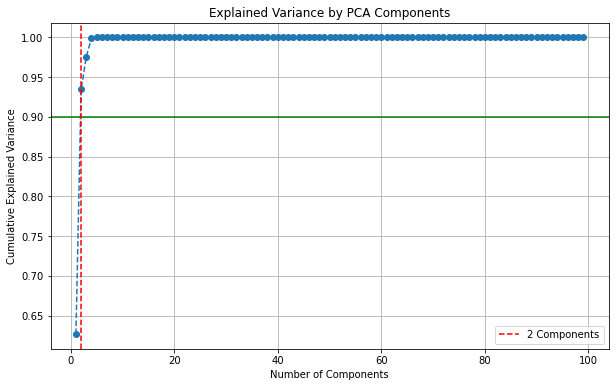

In [46]:
# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=target_variance, color='g', linestyle='-')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{num_components} Components')
plt.legend(loc='best')
plt.grid()
plt.show()

In [95]:
# declare feature vector and target variable

X = df[['contact_duration', 'euribor_3_months_rate','number_employees','housing_loan_yes',]]
y = df['y']

In [97]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [99]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0,min_samples_leaf=3,n_estimators = 100)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.8991


In [103]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[7495 1073]
 [ 652 7874]]


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90      8568
           1       0.88      0.92      0.90      8526

    accuracy                           0.90     17094
   macro avg       0.90      0.90      0.90     17094
weighted avg       0.90      0.90      0.90     17094

